## 1. Introduction
This goal of this project is to gain insights from the crime data of Chicago area in 2019. 

I have been staying in Chicago area for 4 years. Saftety concern has always been an issue in this area. With data analysis tool, I start to look into the crime in this area with the closest data especially geowise to gain more insights.

## 2. Import data

* Install packages

In [6]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 2s (143 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.

In [7]:
!pip install  -U git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-z888f78i
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-z888f78i
     |████████████████████████████████| 10.1MB 2.8MB/s 
     |████████████████████████████████| 225kB 50.3MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756033 sha256=cf67c2d1d7d96f65cec7fc74eee75a27b5bd6dde385df2ef3b2ee13d869e120a
  Stored in directory: /tmp/pip-ephem-wheel-cache-256f1hlt/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32607 sha256=ad63374becef302fc321ace9564f4a070199b4c1c111a50cc39ee3f7fc662a36
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


In [8]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-sjsxh25f
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-sjsxh25f
  Created wheel for folium: filename=folium-0.10.1+6.g4a7532d-py2.py3-none-any.whl size=93921 sha256=d802567796d5ad2df534dc50adc66bf413d457bf8cac44581c9bf59ce6d6381f
  Stored in directory: /tmp/pip-ephem-wheel-cache-foplxqqe/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1+6.g4a7532d which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


* Import packages

In [0]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Greens')
%matplotlib inline 
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
from mpl_toolkits.basemap import Basemap
import folium
from sklearn.cluster import KMeans
from google.colab import files

* Load data

In [71]:
uploaded = files.upload()

Saving Police_Stations.csv to Police_Stations (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Crimes_2019_chi.csv']))

In [0]:
df_ps = pd.read_csv(io.BytesIO(uploaded['Police_Stations.csv']))

## 3. Data exploration

### 3.1 Understand the data

In [14]:
df.head()

ID Case Number  ...  Longitude                       Location
0  11937375    JC566342  ... -87.752683  (41.977881445, -87.752683352)
1  11937712    JC566735  ... -87.676847  (41.950532948, -87.676846669)
2  11937620    JC566695  ... -87.644292  (41.936799488, -87.644291704)
3  11937192    JC566077  ... -87.707707  (41.900993603, -87.707706744)
4  11937298    JC566169  ... -87.616187  (41.706597214, -87.616186967)

[5 rows x 22 columns]

In [15]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [0]:
# remove white space in the column name
df = df.rename(columns=lambda x: ''.join(x.split()))

In [17]:
df.columns

Index(['ID', 'CaseNumber', 'Date', 'Block', 'IUCR', 'PrimaryType',
       'Description', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'CommunityArea', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'UpdatedOn', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [18]:
# check datatype for all columns
# Pandas uses the object dtype for storing strings
df.dtypes

ID                       int64
CaseNumber              object
Date                    object
Block                   object
IUCR                    object
PrimaryType             object
Description             object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Ward                   float64
CommunityArea          float64
FBICode                 object
XCoordinate            float64
YCoordinate            float64
Year                     int64
UpdatedOn               object
Latitude               float64
Longitude              float64
Location                object
dtype: object

In [19]:
df.shape

(257002, 22)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257002 entries, 0 to 257001
Data columns (total 22 columns):
ID                     257002 non-null int64
CaseNumber             257002 non-null object
Date                   257002 non-null object
Block                  257002 non-null object
IUCR                   257002 non-null object
PrimaryType            257002 non-null object
Description            257002 non-null object
LocationDescription    256038 non-null object
Arrest                 257002 non-null bool
Domestic               257002 non-null bool
Beat                   257002 non-null int64
District               257002 non-null int64
Ward                   256987 non-null float64
CommunityArea          256998 non-null float64
FBICode                257002 non-null object
XCoordinate            255447 non-null float64
YCoordinate            255447 non-null float64
Year                   257002 non-null int64
UpdatedOn              257002 non-null object
Latitude           

In [21]:
df.describe()

ID           Beat  ...       Latitude      Longitude
count  2.570020e+05  257002.000000  ...  255447.000000  255447.000000
mean   1.172600e+07    1136.884195  ...      41.843501     -87.669450
std    5.258066e+05     696.612343  ...       0.086692       0.059432
min    2.436800e+04     111.000000  ...      36.619446     -91.686566
25%    1.165313e+07     611.000000  ...      41.768642     -87.711890
50%    1.174934e+07    1024.000000  ...      41.864034     -87.662732
75%    1.184400e+07    1722.000000  ...      41.903776     -87.627668
max    1.194422e+07    2535.000000  ...      42.022567     -87.524529

[8 rows x 10 columns]

## 3.2 Group by different features

* Crime Type

In [22]:
df_pt = pd.DataFrame(df.groupby('PrimaryType').size().rename('count').sort_values(ascending = False).reset_index())
df_pt.head()

PrimaryType  count
0               THEFT  61937
1             BATTERY  49392
2     CRIMINAL DAMAGE  26612
3             ASSAULT  20566
4  DECEPTIVE PRACTICE  17477

Text(0.5, 1.0, 'Fig1. Number of crimes group by type')

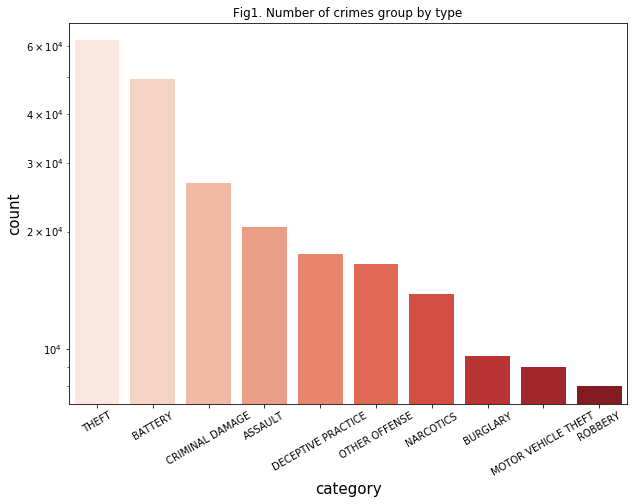

In [23]:
# Fig1. Number of crimes group by type
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='PrimaryType',y='count',data=df_pt.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('category',fontsize = 15)
plt.xticks(fontsize=10, rotation=30)
plt.title('Fig1. Number of crimes group by type')

In [24]:
df_ld = pd.DataFrame(df.groupby('LocationDescription').size().rename('count').sort_values(ascending = False).reset_index())
df_ld.head()

LocationDescription  count
0              STREET  56358
1           RESIDENCE  42226
2           APARTMENT  34285
3            SIDEWALK  20090
4               OTHER  10511

* Location Description

Text(0.5, 1.0, 'Fig2. Number of crimes group by location')

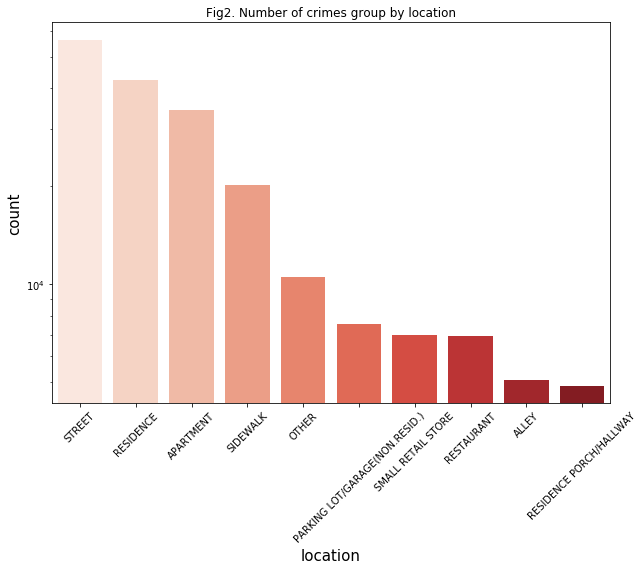

In [25]:
#Fig2. Number of crimes group by location
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='LocationDescription',y='count',data=df_ld.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('location',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig2. Number of crimes group by location')

* Block/street

In [0]:
tmp0 = df['Block'].apply(lambda x:' '.join(x.split()[1:]))
df['Street']=tmp0

In [27]:
df_st = pd.DataFrame(df.groupby('Street').size().rename('count').sort_values(ascending = False).reset_index())
df_st.head()

Street  count
0                 S MICHIGAN AVE   2945
1                     S STATE ST   2934
2  S DR MARTIN LUTHER KING JR DR   2546
3                   W MADISON ST   2493
4                   S HALSTED ST   2483

Text(0.5, 1.0, 'Fig3. Number of crimes group by street')

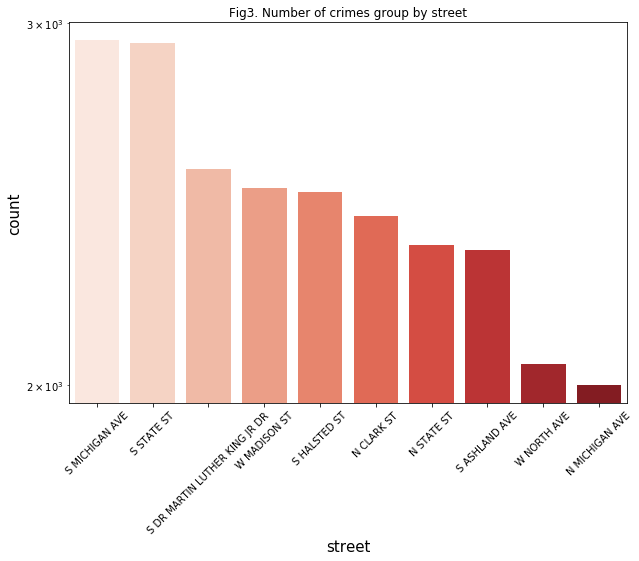

In [28]:
#Fig3. Number of crimes group by block
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Street',y='count',data=df_st.head(10),palette = 'Reds',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('street',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig3. Number of crimes group by street')

* Date

In [29]:
tmp1 = pd.to_datetime(df.Date)
df['Date'] = tmp1
df['Month'] = tmp1.dt.month
df['Day'] = tmp1.dt.day
df['Hour'] = tmp1.dt.hour
df['Weekday'] = tmp1.dt.dayofweek
df.head()

ID CaseNumber                Date  ... Day Hour Weekday
0  11937375   JC566342 2019-12-31 00:23:00  ...  31    0       1
1  11937712   JC566735 2019-12-31 17:06:00  ...  31   17       1
2  11937620   JC566695 2019-12-31 14:00:00  ...  31   14       1
3  11937192   JC566077 2019-12-31 02:20:00  ...  31    2       1
4  11937298   JC566169 2019-12-31 06:10:00  ...  31    6       1

[5 rows x 27 columns]

In [30]:
# month
df_mon = pd.DataFrame(df.groupby('Month').size().rename('count').sort_values(ascending = False).reset_index())
df_mon.head()

Month  count
0      7  24627
1      8  24045
2      5  23474
3      6  23356
4      9  22105

In [31]:
# weekday
df_wd = pd.DataFrame(df.groupby('Weekday').size().rename('count').sort_values(ascending = False).reset_index())
df_wd.head()

Weekday  count
0        4  38524
1        5  37724
2        0  36638
3        1  36517
4        3  35967

In [32]:
# hour
df_hr = pd.DataFrame(df.groupby('Hour').size().rename('count').sort_values(ascending = False).reset_index())
df_hr.head()

Hour  count
0    12  15230
1    18  14804
2    19  14772
3    17  14375
4    15  14279

Text(0.5, 0.98, 'Fig4.1. Number of crimes group by date')

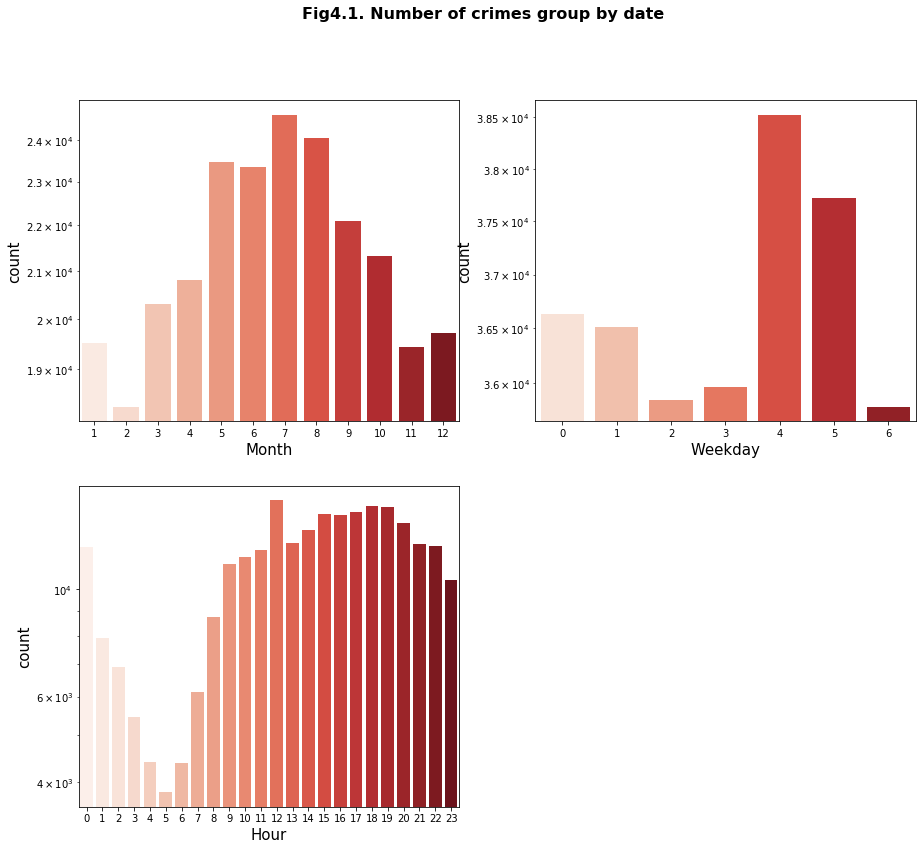

In [33]:
#Fig4. Number of crimes group by date
row = 2
col = 2
figure,ax = plt.subplots(row,col,figsize=(15,13))
df_to_plot = [df_mon,df_wd,df_hr]
titles = ['Month','Weekday','Hour']

for index,df_tmp in enumerate(df_to_plot):
  ax_tmp = ax[index//col,index%col]
  sns.barplot(x = df_tmp.columns[0],y = df_tmp.columns[1],data = df_tmp,palette = 'Reds',log = True,ax = ax_tmp)
  ax_tmp.set_xlabel(df_tmp.columns[0],fontsize = 15)
  ax_tmp.set_ylabel(df_tmp.columns[1],fontsize = 15)
  plt.xticks(fontsize=10, rotation=0)
  count = index+1

while count < row*col:
  ax[count//col,count%col].set_axis_off()
  count+=1
plt.suptitle('Fig4.1. Number of crimes group by date',fontsize = 16,fontweight='bold')



In [34]:
df_mont_wd = pd.DataFrame(df.groupby(['Month','Day']).size().rename('count').sort_values(ascending = False).reset_index())
df_mont_wd.head()

Month  Day  count
0      1    1    989
1      7   13    888
2      7    5    884
3      6    1    877
4      6    8    876

Text(0.5, 0.98, 'Fig4.2. Number of crimes by date')

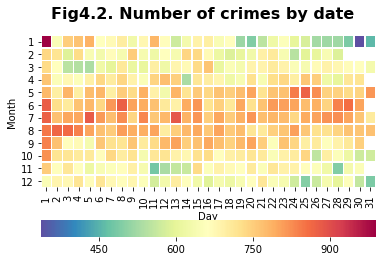

In [35]:
df_mont_wd_pv = df_mont_wd.pivot("Month", "Day", "count")
ax = sns.heatmap(df_mont_wd_pv,linewidths=.5,cmap="Spectral_r",cbar_kws={"orientation": "horizontal"})
plt.suptitle('Fig4.2. Number of crimes by date',fontsize = 16,fontweight='bold')

* Winter

Most crimes(over 900) happend on the New Year's day, then it start to decrease, reaching the lowest at end of the January. I guess one of the possisble reasons of is that many people come back from holiday on New Year's Day, involing travel, traffic,etc. On the other hand, there are many celebration events going on that day, which brings a lot of activies for possible crimes.

From February,to April, crimes on average are around 600, which is low comparing to other months.

* Spring to summer

Starting from May, we can see an increase in the total crime number, especially approaching the end. And it stays high until the mid September.

Possibly, as the weather becomes warmer,more crimes happend. Noticeably, February crime is the lowest in 2019. Normally, this is the coldest month in Chicago with large amount of snow, which I guess brings incovenience to crimes.

* Fall to winter

In the winter (October to December), the crime stays relatively low. Not surprisingly, Christmas Day turns out to be the lowest since most people are staying home and there are few people on the street.

In [36]:
df_wd_hr = pd.DataFrame(df.groupby(['Weekday','Hour']).size().rename('count').sort_values(ascending = False).reset_index())
df_wd_hr.head()

Weekday  Hour  count
0        0    12   2351
1        4    12   2345
2        1    12   2293
3        2    12   2254
4        4    19   2246

Text(0.5, 0.98, 'Fig4.3. Number of crimes by Hour')

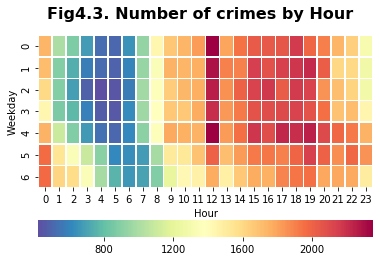

In [37]:
df_wd_hr_pv = df_wd_hr.pivot("Weekday", "Hour", "count")
ax = sns.heatmap(df_wd_hr_pv,linewidths=.5,cmap="Spectral_r",cbar_kws={"orientation": "horizontal"})
plt.suptitle('Fig4.3. Number of crimes by Hour',fontsize = 16,fontweight='bold')

The peak is around the noon and evening (3-7 pm). 
It would help to distribute more police at these timeslots

In [38]:
top_10_st = df_st.head(20)['Street'].tolist()
df_wd_st = pd.DataFrame(df[df['Street'].isin(top_10_st)].groupby(['Street','Weekday']).size().rename('count')).reset_index()
df_wd_st.head()

Street  Weekday  count
0  N CLARK ST        0    277
1  N CLARK ST        1    312
2  N CLARK ST        2    331
3  N CLARK ST        3    289
4  N CLARK ST        4    367

Text(0.5, 0.98, 'Fig4.4. Number of crimes by street')

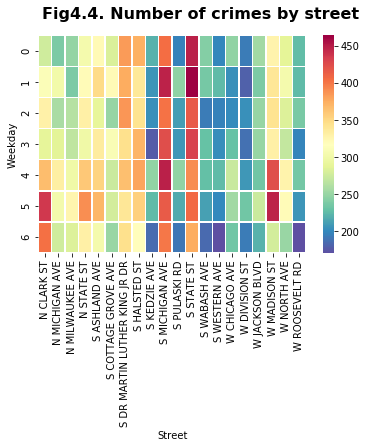

In [39]:
df_wd_st_pv = df_wd_st.pivot("Weekday", "Street", "count")
ax = sns.heatmap(df_wd_st_pv,linewidths=.5,cmap="Spectral_r")
plt.suptitle('Fig4.4. Number of crimes by street',fontsize = 16,fontweight='bold')

In [40]:
df.head()

ID CaseNumber                Date  ... Day Hour Weekday
0  11937375   JC566342 2019-12-31 00:23:00  ...  31    0       1
1  11937712   JC566735 2019-12-31 17:06:00  ...  31   17       1
2  11937620   JC566695 2019-12-31 14:00:00  ...  31   14       1
3  11937192   JC566077 2019-12-31 02:20:00  ...  31    2       1
4  11937298   JC566169 2019-12-31 06:10:00  ...  31    6       1

[5 rows x 27 columns]

* Resolution/arrest

In [0]:
#df['Arrest'] = df['Arrest'].astype(int)
#df.head(5)

In [42]:
df_arr = df.groupby(['PrimaryType','Arrest']).size().rename('count').reset_index()
df_arr.head()

PrimaryType  Arrest  count
0       ARSON   False    343
1       ARSON    True     29
2     ASSAULT   False  16859
3     ASSAULT    True   3707
4     BATTERY   False  39174

Text(0.5, 1.0, 'Fig5. Resolution group by crimes')

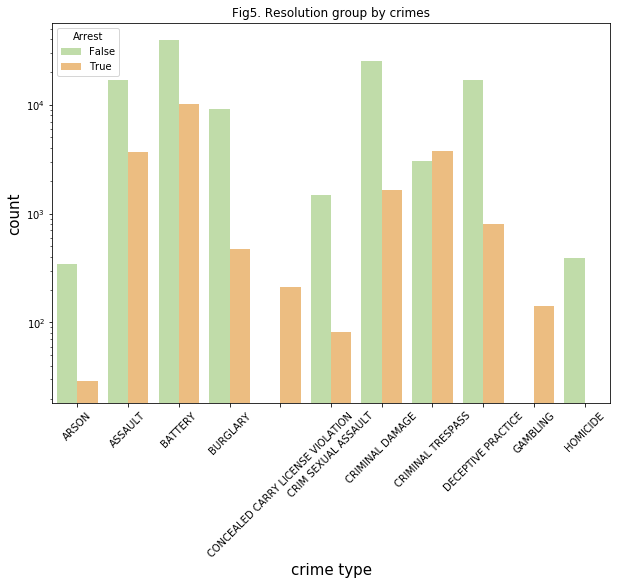

In [43]:
figure,ax = plt.subplots(figsize=(10,7))
sns.barplot(x = 'PrimaryType',y='count',hue ='Arrest', data = df_arr.head(20),palette = 'Spectral_r',log = True)
ax.set_ylabel('count',fontsize = 15)
ax.set_xlabel('crime type',fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.title('Fig5. Resolution group by crimes')

## 3.3 Geowise Visualization

In [44]:
df.describe()

ID           Beat  ...           Hour        Weekday
count  2.570020e+05  257002.000000  ...  257002.000000  257002.000000
mean   1.172600e+07    1136.884195  ...      13.111131       3.009868
std    5.258066e+05     696.612343  ...       6.548004       1.995248
min    2.436800e+04     111.000000  ...       0.000000       0.000000
25%    1.165313e+07     611.000000  ...       9.000000       1.000000
50%    1.174934e+07    1024.000000  ...      14.000000       3.000000
75%    1.184400e+07    1722.000000  ...      18.000000       5.000000
max    1.194422e+07    2535.000000  ...      23.000000       6.000000

[8 rows x 14 columns]

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


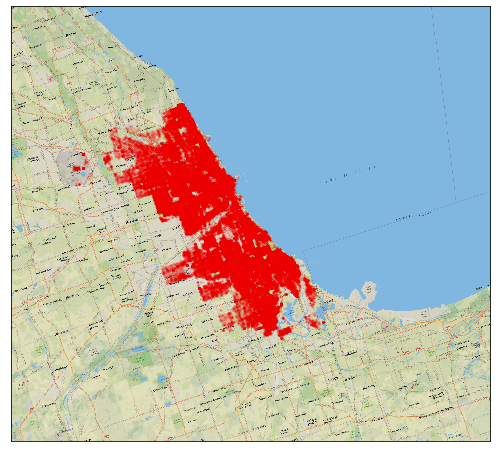

In [45]:
bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
            llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
x,y= bm(list(df.Longitude[(df.Longitude.isnull()==False)]),list(df.Latitude[(df.Latitude.isnull()==False)]))
plt.figure(figsize=(10,8))
bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
bm.scatter(x,y,c = 'r',marker ='o',s=2,alpha=0.05)

In [46]:
from folium.plugins import HeatMap
map_heat= folium.Map(location=[41.843489, -87.669451],zoom_start = 10, control_scale=True) 
df_data=df.dropna(axis = 0, subset = ['Latitude'] )
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df_data[:20000].iterrows()]
HeatMap(heat_data,radius=12).add_to(map_heat)
map_heat

## 3.4 K means Clustering

In [47]:
df.head()

ID CaseNumber                Date  ... Day Hour Weekday
0  11937375   JC566342 2019-12-31 00:23:00  ...  31    0       1
1  11937712   JC566735 2019-12-31 17:06:00  ...  31   17       1
2  11937620   JC566695 2019-12-31 14:00:00  ...  31   14       1
3  11937192   JC566077 2019-12-31 02:20:00  ...  31    2       1
4  11937298   JC566169 2019-12-31 06:10:00  ...  31    6       1

[5 rows x 27 columns]

In [48]:
df.describe()

ID           Beat  ...           Hour        Weekday
count  2.570020e+05  257002.000000  ...  257002.000000  257002.000000
mean   1.172600e+07    1136.884195  ...      13.111131       3.009868
std    5.258066e+05     696.612343  ...       6.548004       1.995248
min    2.436800e+04     111.000000  ...       0.000000       0.000000
25%    1.165313e+07     611.000000  ...       9.000000       1.000000
50%    1.174934e+07    1024.000000  ...      14.000000       3.000000
75%    1.184400e+07    1722.000000  ...      18.000000       5.000000
max    1.194422e+07    2535.000000  ...      23.000000       6.000000

[8 rows x 14 columns]

In [49]:
x = 5
la_min = df['Latitude'].mean() - x*df['Latitude'].std()
la_max = df['Latitude'].mean() + x*df['Latitude'].std()
lo_min = df['Longitude'].mean() - x*df['Longitude'].std()
lo_max = df['Longitude'].mean() + x*df['Longitude'].std()
data = df[(df['Latitude']<= la_max)&(df['Latitude']>= la_min)&(df['Longitude']<= lo_max)&(df['Longitude']>= lo_min)]
data = data[['Latitude','Longitude']]
data = data.dropna(axis = 0, subset = ['Latitude'] )
data.head()

Latitude  Longitude
0  41.977881 -87.752683
1  41.950533 -87.676847
2  41.936799 -87.644292
3  41.900994 -87.707707
4  41.706597 -87.616187

In [0]:
def kmeans_cluster(data, n):
  '''
  data : input dataframe
  n : cluster_number
  '''
  model = KMeans(n)
  model.fit(data)
  cluster_label = model.predict(data)
  centeroid = model.cluster_centers_
  return cluster_label, centeroid

* 2 clusters

In [0]:
def x_clusters(n,data):
  cluster_label_x, centeroid_x = kmeans_cluster(data,n)
  kmeans = pd.DataFrame(cluster_label_x)
  center = pd.DataFrame(centeroid_x)
  center.columns = ['Latitude','Longitude']
  datax = data.assign(label=kmeans)
  return kmeans,center,datax

In [0]:
kmeans2,center2,data2 = x_clusters(2,data)

In [53]:
data2.head(5)

Latitude  Longitude  label
0  41.977881 -87.752683    1.0
1  41.950533 -87.676847    1.0
2  41.936799 -87.644292    1.0
3  41.900994 -87.707707    1.0
4  41.706597 -87.616187    0.0

In [0]:
#sns.scatterplot(x='Longitude',y='Latitude',data = datax,palette='spectral',size=150)
#sns.scatterplot(x='Longitude',y='Latitude',data = datay,size=280)

In [0]:
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'}
def plot_cluster(kmeans,data,center):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  ax.set_title('K-Means Clustering')
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  plt.scatter(data['Longitude'],data['Latitude'], c=label_color)
  plt.scatter(center['Longitude'],center['Latitude'], c = 'blue',marker='x',s = 150)

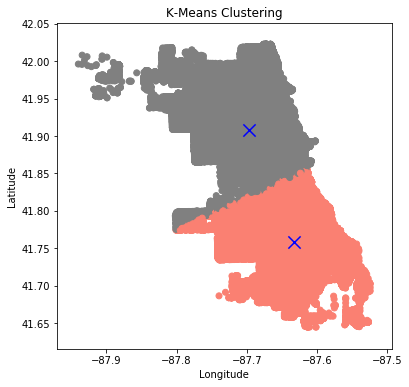

In [145]:
plot_cluster(kmeans2,data2,center2)

In [0]:
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'}
def plot_clustermap(kmeans,data,center):
  bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
              llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
  x,y= bm(list(data.Longitude),list(data.Latitude))
  cx,cy = bm(list(center.Longitude),list(center.Latitude))
  plt.figure(figsize=(10,8))
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
  bm.scatter(x,y,c=label_color,marker='o',s=2,alpha=0.01)
  bm.scatter(cx,cy,c ='blue',marker='x',s=50,alpha=1)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


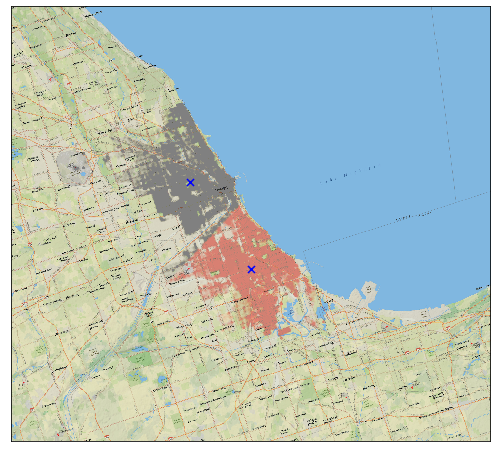

In [58]:
plot_clustermap(kmeans2,data2,center2)

* 3 clusters

In [0]:
kmeans3,center3,data3 = x_clusters(3,data)

In [60]:
data3.head()

Latitude  Longitude  label
0  41.977881 -87.752683    0.0
1  41.950533 -87.676847    2.0
2  41.936799 -87.644292    2.0
3  41.900994 -87.707707    0.0
4  41.706597 -87.616187    1.0

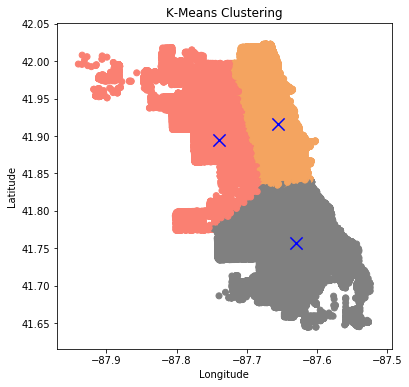

In [146]:
plot_cluster(kmeans3,data3,center3)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


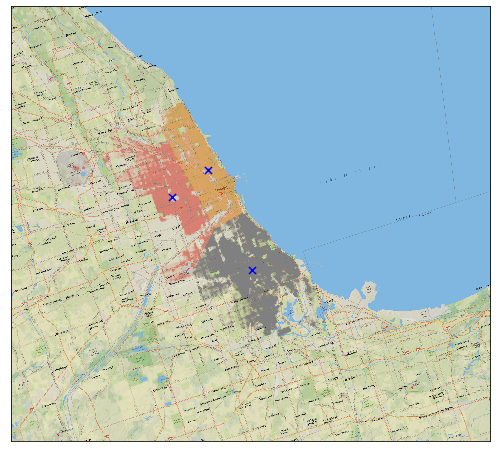

In [62]:
plot_clustermap(kmeans3,data3,center3)

* 6 clusters

In [0]:
kmeans6,center6,data6 = x_clusters(6,data)

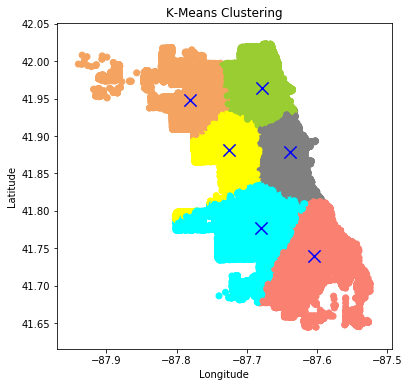

In [147]:
plot_cluster(kmeans6,data6,center6)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


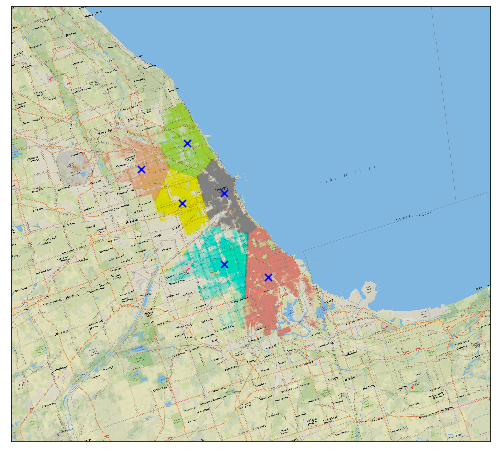

In [65]:
plot_clustermap(kmeans6,data6,center6)

* 10 clusters

In [0]:
kmeans10,center10,data10, = x_clusters(10,data)

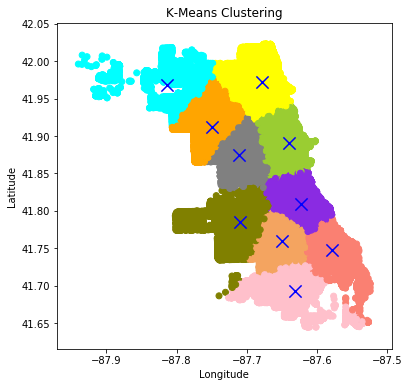

In [148]:
plot_cluster(kmeans10,data10,center10)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


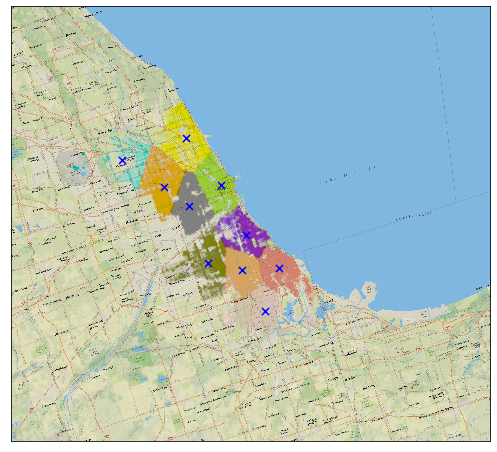

In [68]:
plot_clustermap(kmeans10,data10,center10)

## Police station

In [120]:
df_ps.head()

DISTRICT   DISTRICT NAME  ...  LONGITUDE                         LOCATION
0             1         Central  ... -87.627356   (41.8583725929, -87.627356171)
1             6         Gresham  ... -87.644229  (41.7521368378, -87.6442289066)
2            11        Harrison  ... -87.705488   (41.8735822883, -87.705488126)
3            16  Jefferson Park  ... -87.766149  (41.9740944511, -87.7661488432)
4  Headquarters    Headquarters  ... -87.623395  (41.8307016873, -87.6233953459)

[5 rows x 15 columns]

In [121]:
df_ps.shape

(23, 15)

In [122]:
df_ps.columns

Index(['DISTRICT', 'DISTRICT NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'WEBSITE', 'PHONE', 'FAX', 'TTY', 'X COORDINATE', 'Y COORDINATE',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [0]:
# rename the columns
def rename_ps(x):
  lis = x.split()
  lis2 = []
  for _ in lis:
    lis2.append(_.lower().capitalize())
  return ''.join(lis2)

df_ps = df_ps.rename(columns=lambda x: rename_ps(x))

In [124]:
df_ps.columns

Index(['District', 'DistrictName', 'Address', 'City', 'State', 'Zip',
       'Website', 'Phone', 'Fax', 'Tty', 'XCoordinate', 'YCoordinate',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [0]:
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'
,11:'black',12:'gold',13:'blue',14:'rosybrown',15:'lime',16:'silver',17:'steelblue',18:'green',19:'plum',20:'lightsteelblue',21:'darkseagreen',22:'indigo'}
def plot_ps(kmeans,data,center,df_ps):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  ax.set_title('K-Means Clustering')
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  plt.scatter(data['Longitude'],data['Latitude'], c=label_color)
  plt.scatter(center['Longitude'],center['Latitude'], c = 'blue',marker='x',s = 150)
  plt.scatter(df_ps['Longitude'],df_ps['Latitude'], c = 'red',marker='o',s = 150)

In [0]:
LABEL_COLOR_MAP = {0 : 'salmon', 1 : 'grey',2 : 'sandybrown',3 : 'yellow', 4 : 'yellowgreen',5: 'cyan',6: 'blueviolet',7:'pink',8:'orange',9:'olive',10:'navy'
,11:'black',12:'gold',13:'blue',14:'rosybrown',15:'lime',16:'silver',17:'steelblue',18:'green',19:'plum',20:'lightsteelblue',21:'darkseagreen',22:'indigo'}

def plot_ps_map(kmeans,data,center,df_ps):
  bm = Basemap(projection='mill',llcrnrlat=df.Latitude.min()+5,urcrnrlat=df.Latitude.max(),
              llcrnrlon=df.Longitude.min()+3.5,urcrnrlon=df.Longitude.max()+0.5,resolution="i",epsg=2770)
  x,y= bm(list(data.Longitude),list(data.Latitude))
  cx,cy = bm(list(center.Longitude),list(center.Latitude))
  x_ps,y_ps= bm(list(df_ps.Longitude[(df_ps.Longitude.isnull()==False)]),list(df_ps.Latitude[(df_ps.Latitude.isnull()==False)]))
  plt.figure(figsize=(10,8))
  labels=kmeans[0]
  label_color = [LABEL_COLOR_MAP[l] for l in labels]
  bm.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
  bm.scatter(x,y,c=label_color,marker='o',s=2,alpha=0.01)
  bm.scatter(cx,cy,c ='blue',marker='x',s=50,alpha=1)
  bm.scatter(x_ps,y_ps,c = 'red',marker ='o',s=50,alpha=1)

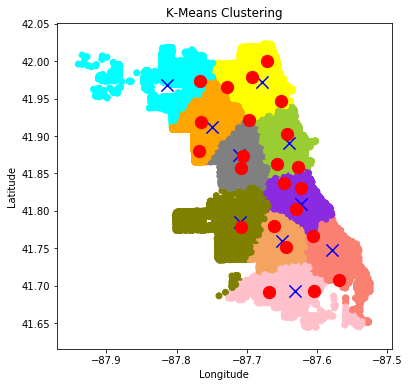

In [150]:
plot_ps(kmeans10,data10,center10,df_ps)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


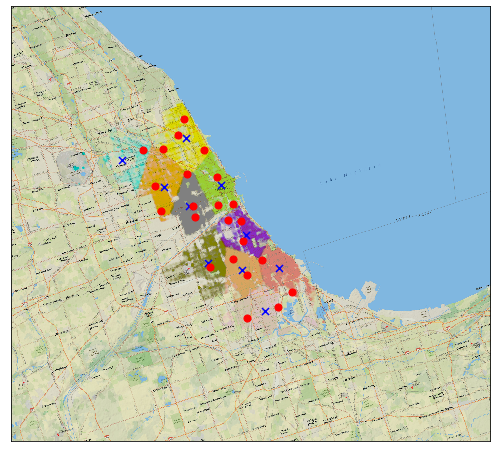

In [129]:
plot_ps_map(kmeans10,data10,center10,df_ps)

In [0]:
kmeans23,center23,data23, = x_clusters(23,data)

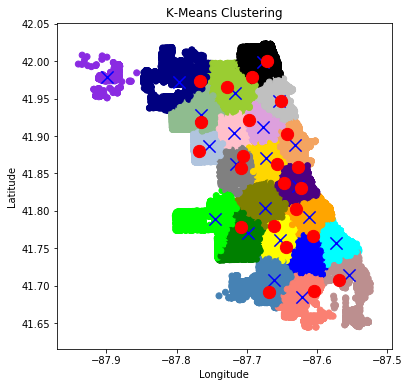

In [151]:
plot_ps(kmeans23,data23,center23,df_ps)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=4466418.094271214,1771449.668502401,4545862.663891507,1843499.3053685855&bboxSR=2770&imageSR=2770&size=1500,1360&dpi=96&format=png32&transparent=true&f=image


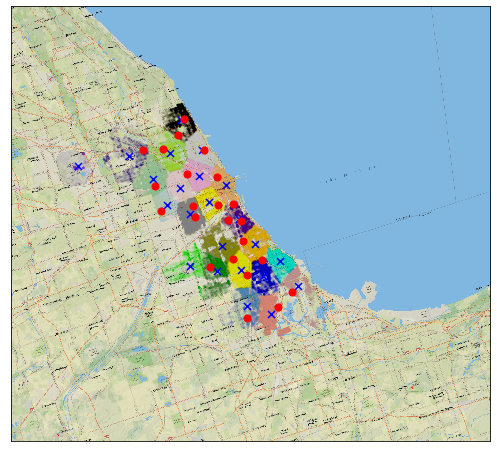

In [130]:
plot_ps_map(kmeans23,data23,center23,df_ps)